In [1]:
import urllib.request
import os
from google.colab import drive
drive.mount('/content/MyDrive/',force_remount=True)
os.chdir('/content/MyDrive/MyDrive/file_zipped')

Mounted at /content/MyDrive/


In [118]:
%pylab inline
!pip install mahotas
import sys
import os
import pandas as pd
import mahotas as mh
import numpy as np
import matplotlib.pyplot as plt 
import shutil
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

Populating the interactive namespace from numpy and matplotlib
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
csv_path = "/content/MyDrive/MyDrive/DL_info.csv"
image_dir = "/content/gdrive/MyDrive/file_unzipped/Images_png/"

In [18]:
df = pd.read_csv(csv_path)           
train_df = df[df['Train_Val_Test']==1]
validation_df = df[df['Train_Val_Test']==2]
test_df = df[df['Train_Val_Test']==3]
print('Train dataset: ', len(train_df.index))
print('Test dataset: ', len(validation_df.index))
print('Validation dataset: ', len(test_df.index))

Train dataset:  22919
Test dataset:  4889
Validation dataset:  4927


In [136]:
image_dir = '/content/MyDrive/MyDrive/file_unzipped/Images_png/'

In [218]:
images = []
bboxes = []
lesions = []

for index, row in test_df.iterrows():
    filename = row['File_name']
    folder = filename.split('_')[0] + '_' + filename.split('_')[1] + '_' + filename.split('_')[2]
    slicefile = filename.rsplit('_')[-1]
       
    #if os.path.exists(image_dir + folder): # only load data that I downloaded
    images.append(image_dir + folder + '/' + slicefile)
    bboxes.append(row['Bounding_boxes'])
    lesions.append(row['Coarse_lesion_type'])

In [178]:
FIXED_SIZE = (50,50)
def crop(img, bbox):

    img = mh.imread(img)
#     imshow(img)

    bbox = bbox.split(',')
    bbox = [int(float(v)) for v in bbox]

    # convert bbox to fixed size
    diff_x = bbox[2] - bbox[0]
    diff_y = bbox[3] - bbox[1]

    pad_x = FIXED_SIZE[0] - diff_x
    pad_y = FIXED_SIZE[1] - diff_y
    
    padded_lesion = img[bbox[1]-int(pad_y/2):bbox[3]+int(pad_y/2), 
                            bbox[0]-int(pad_x/2):bbox[2]+int(pad_x/2)]

         
           
    if img.shape[0] != FIXED_SIZE[0] or img.shape[1] != FIXED_SIZE[1]:
         padded_lesion = resize(padded_lesion,FIXED_SIZE )

    #print(padded_lesion.shape)
    
    return padded_lesion

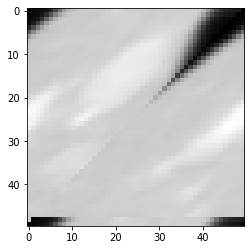

In [220]:
img = crop(images[0], bboxes[0]) 
plt.imshow(img, cmap='gray')

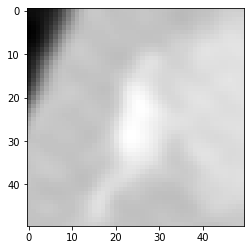

In [151]:
img = crop(images[1], bboxes[1]) 
plt.imshow(img, cmap='gray')

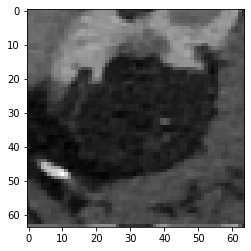

In [161]:
img = crop(images[10], bboxes[10]) 
plt.imshow(img, cmap='gray')

*#NUMBER 8 IMAGE*

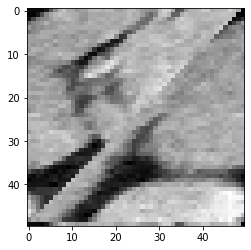

In [223]:
img = crop(images[1004], bboxes[1004]) 
plt.imshow(img, cmap='gray')

Original image

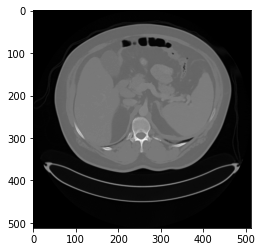

In [224]:
origin=images[1004]
origin = mh.imread(origin)
plt.imshow(origin, cmap='gray')



In [228]:
bboxes[1004]

'200.319, 178.98, 243.662, 208.319'

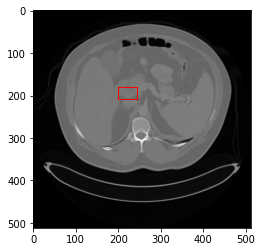

In [229]:
rect=patches.Rectangle((200.319, 178.98), 243.662-200.319, 208.319-178.98, linewidth=1, edgecolor='r', facecolor='none')
fig, ax = plt.subplots()
ax.imshow(origin, cmap='gray')
ax.add_patch(rect)
plt.show()
